In [ ]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
from pathlib import Path

# Untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set_palette('Set1')
sns.set()

# Untuk pemodelan
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Untuk menghilangkan warnings saat plotting seaborn
import warnings
warnings.filterwarnings('ignore')

# Untuk mengupload file
from google.colab import files

In [ ]:
# Upload semua dataset yang dipakai
uploaded = files.upload()

Saving tourism_rating.csv to tourism_rating.csv
Saving tourism_with_id.csv to tourism_with_id.csv
Saving user_new.csv to user_new.csv


In [ ]:
# Menyimpan masing-masing dataset kedalam variabel

rating = pd.read_csv('tourism_rating.csv')
place = pd.read_csv('tourism_with_id.csv')
user = pd.read_csv('user_new.csv')

In [ ]:
# Melihat gambaran data place

place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2


In [ ]:
# Membuang kolom yang tidak dipakai

place = place.drop(['Unnamed: 11','Unnamed: 12'],axis=1)
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125


In [ ]:
# Merubah data agar hanya dari Kota Bandung

place = place[place['City']=='Bandung']
place.head(2)

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long
210,211,GunungTangkuban perahu,Gunung Tangkuban Parahu adalah salah satu gunu...,Cagar Alam,Bandung,30000,4.5,NaN,"{'lat': -6.759637700000001, 'lng': 107.6097807}",-6.759638,107.609781
211,212,Jalan Braga,Jalan Braga adalah nama sebuah jalan utama di ...,Budaya,Bandung,0,4.7,NaN,"{'lat': -6.9150534, 'lng': 107.6089842}",-6.915053,107.608984


In [ ]:
place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 210 to 333
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      124 non-null    int64  
 1   Place_Name    124 non-null    object 
 2   Description   124 non-null    object 
 3   Category      124 non-null    object 
 4   City          124 non-null    object 
 5   Price         124 non-null    int64  
 6   Rating        124 non-null    float64
 7   Time_Minutes  50 non-null     float64
 8   Coordinate    124 non-null    object 
 9   Lat           124 non-null    float64
 10  Long          124 non-null    float64
dtypes: float64(4), int64(2), object(5)
memory usage: 11.6+ KB


In [ ]:
# Membuang kolom yang tidak dipakai

place = place.drop('Time_Minutes', axis=1)

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [ ]:
# Merubah data rating agar hanya berisi rating pada tempat wisata dari Kota Bandung

rating = pd.merge(rating, place[['Place_Id']], how='right', on='Place_Id')
rating.head()

,User_Id,Place_Id,Place_Ratings
0,9,211,3
1,26,211,2
2,40,211,3
3,40,211,2
4,70,211,5


In [ ]:
# Melihat ukuran dataset rating untuk Kota Bandung

rating.shape

(2842, 3)

In [ ]:
# Melihat gambaran data user

user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [ ]:
# Merubah data user agar hanya berisi user yang pernah megunjungi wisata di Kota Bandung

user = pd.merge(user, rating[['User_Id']], how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
# user.head()
new = pd.merge(user[['User_Id','Age']], rating, how='right', on='User_Id').drop_duplicates().sort_values('User_Id')
new.head(20)

,User_Id,Age,Place_Id,Place_Ratings
2675,1,20,328,2
2185,1,20,307,4
1831,1,20,292,3
2082,1,20,302,2
2297,1,20,312,2
1241,1,20,265,5
1078,1,20,258,5
260,1,20,222,3
795,1,20,246,4
2505,2,21,321,3


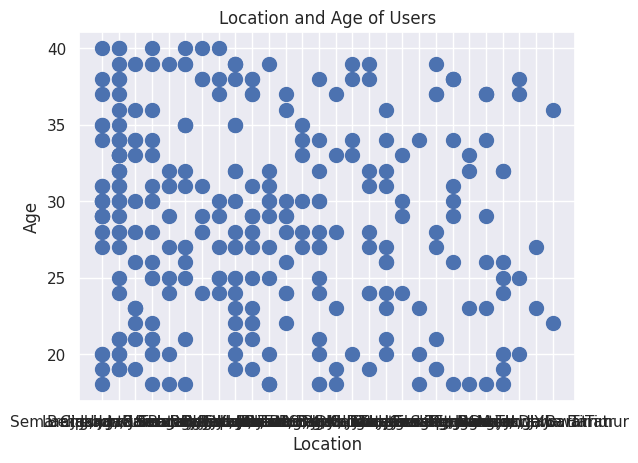

In [ ]:
# Create the plot
fig, ax = plt.subplots()

# Plot the location and age of the users
ax.scatter(user['Location'], user['Age'], s=100)

# Add a title and labels to the plot
ax.set_title('Location and Age of Users')
ax.set_xlabel('Location')
ax.set_ylabel('Age')

# Show the plot
plt.show()

In [ ]:
# Melihat dataset user yang pernah memberi rating pada wisata di Kota Bandung

user.shape

(300, 3)

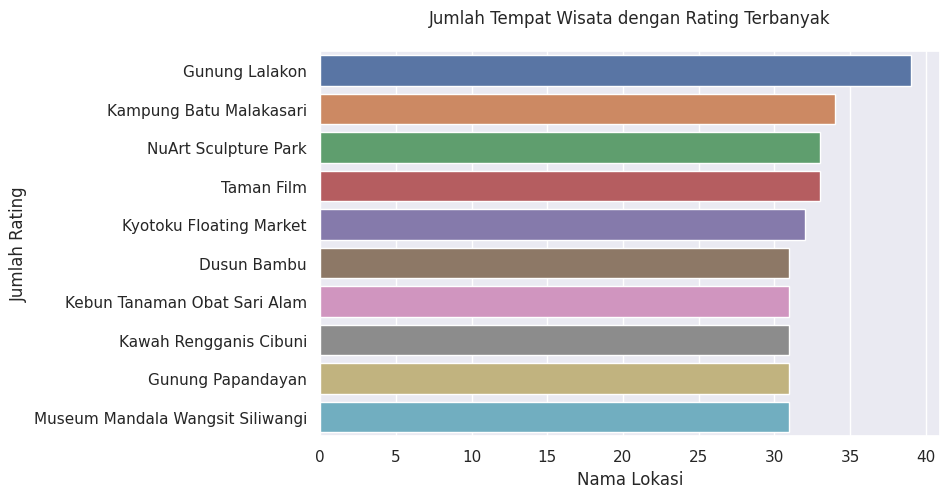

In [ ]:
# Membuat dataframe berisi lokasi dengan jumlah rating terbanyak
top_10 = rating['Place_Id'].value_counts().reset_index()[0:10]
top_10 = pd.merge(top_10, place[['Place_Id','Place_Name']], how='left', left_on='index', right_on='Place_Id')

# Membuat visualisasi wisata dengan jumlah rating terbanyak
plt.figure(figsize=(8,5))
sns.barplot(x='Place_Id_x', y='Place_Name', data=top_10)
plt.title('Jumlah Tempat Wisata dengan Rating Terbanyak', pad=20)
plt.ylabel('Jumlah Rating')
plt.xlabel('Nama Lokasi')
plt.show()

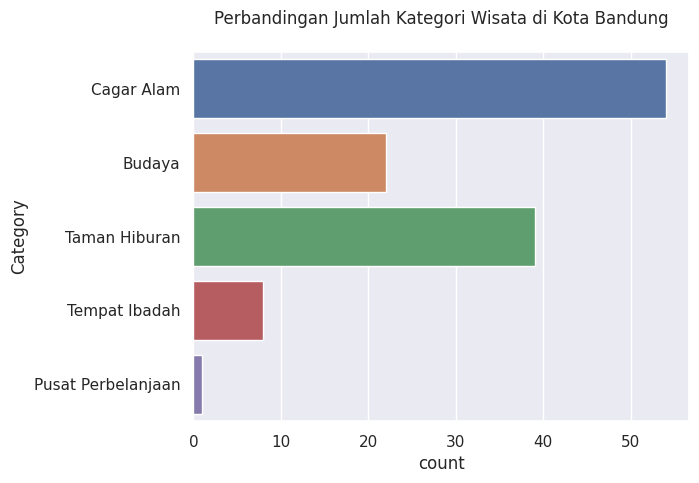

In [ ]:
# Membuat visualisasi jumlah kategori wisata di Kota Bandung

sns.countplot(y='Category', data=place)
plt.title('Perbandingan Jumlah Kategori Wisata di Kota Bandung', pad=20)
plt.show()

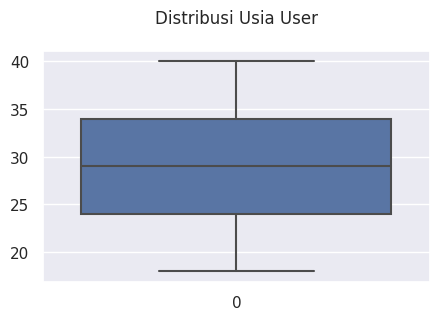

In [ ]:
# Membuat visualisasi distribusi usia user

plt.figure(figsize=(5,3))
sns.boxplot(user['Age']);
plt.title('Distribusi Usia User', pad=20)
plt.show()

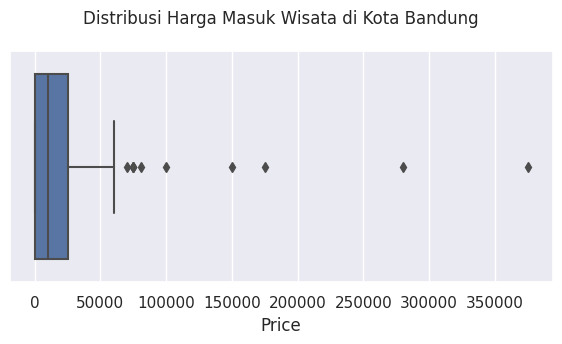

In [ ]:
# Membuat visualisasi distribusi harga masuk tempat wisata

plt.figure(figsize=(7,3))
sns.boxplot(data=place, x='Price')
plt.title('Distribusi Harga Masuk Wisata di Kota Bandung', pad=20)
plt.show()

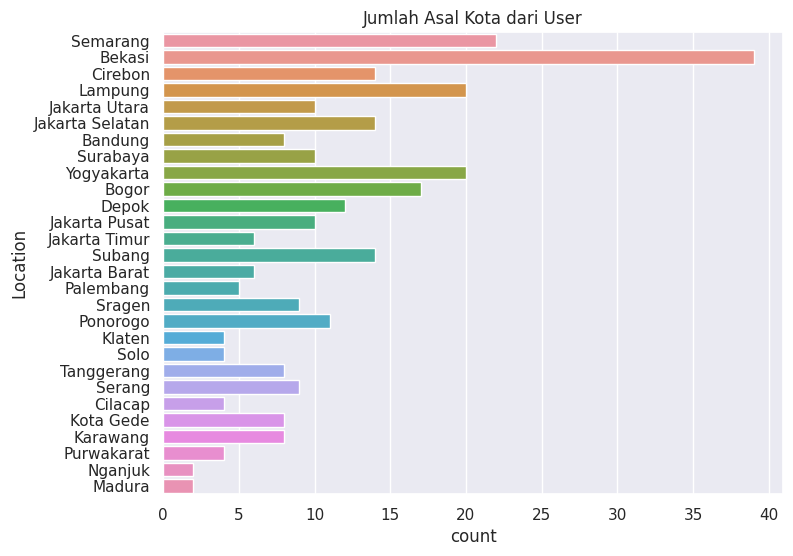

In [ ]:
# Memfilter asal kota dari user
askot = user['Location'].apply(lambda x : x.split(',')[0])

# Visualisasi asal kota dari user
plt.figure(figsize=(8,6))
sns.countplot(y=askot)
plt.title('Jumlah Asal Kota dari User')
plt.show()

In [ ]:
# Membaca dataset untuk dilakukan encoding
 
df = new.copy()
df.head()

,User_Id,Age,Place_Id,Place_Ratings
2675,1,20,328,2
2185,1,20,307,4
1831,1,20,292,3
2082,1,20,302,2
2297,1,20,312,2


In [ ]:
def dict_encoder(col, data=df):

  # Mengubah kolom suatu dataframe menjadi list tanpa nilai yang sama
  unique_val = data[col].unique().tolist()

  # Melakukan encoding value kolom suatu dataframe ke angka
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

In [ ]:
# Encoding User_Id
user_to_user_encoded, user_encoded_to_user = dict_encoder('User_Id')

# Mapping User_Id ke dataframe
df['user'] = df['User_Id'].map(user_to_user_encoded)

In [ ]:
# Encoding Place_Id
place_to_place_encoded, place_encoded_to_place = dict_encoder('Place_Id')

# Mapping Place_Id ke dataframe place
df['place'] = df['Place_Id'].map(place_to_place_encoded)

In [ ]:
# Mendapatkan jumlah user dan place
num_users, num_place = len(user_to_user_encoded), len(place_to_place_encoded)
 
# Mengubah rating menjadi nilai float
df['Place_Ratings'] = df['Place_Ratings'].values.astype(np.float32)
 
# Mendapatkan nilai minimum dan maksimum rating
min_rating, max_rating = min(df['Place_Ratings']), max(df['Place_Ratings'])
 
print(f'Number of User: {num_users}, Number of Place: {num_place}, Min Rating: {min_rating}, Max Rating: {max_rating}')

Number of User: 300, Number of Place: 124, Min Rating: 1.0, Max Rating: 5.0


In [ ]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df.head(32)

,User_Id,Age,Place_Id,Place_Ratings,user,place
1638,117,30,282,3.0,116,107
129,267,31,216,4.0,266,106
2830,158,23,334,3.0,157,31
1883,154,31,294,3.0,153,22
1412,119,25,272,2.0,118,83
1197,30,30,263,2.0,29,100
2574,145,37,323,3.0,144,90
2782,150,40,332,5.0,149,81
223,200,34,220,5.0,199,115
1739,113,38,287,5.0,112,113


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan place menjadi satu value
x = df[['user', 'place','Age']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['Place_Ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

In [ ]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.places_embedding = layers.Embedding( # layer embeddings places
        num_places,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.places_bias = layers.Embedding(num_places, 1) # layer embedding places bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    places_vector = self.places_embedding(inputs[:, 1]) # memanggil layer embedding 3
    places_bias = self.places_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_places = tf.tensordot(user_vector, places_vector, 2) 
 
    x = dot_user_places + user_bias + places_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = RecommenderNet(num_users, num_place, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.0004),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_root_mean_squared_error')<0.25):
      print('Lapor! Metriks validasi sudah sesuai harapan')
      self.model.stop_training = True

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks = [myCallback()]
)

Epoch 1/100
71/71 [==============================] - 2s 6ms/step - loss: 0.7148 - root_mean_squared_error: 0.3545 - val_loss: 0.7136 - val_root_mean_squared_error: 0.3550
Epoch 2/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7137 - root_mean_squared_error: 0.3538 - val_loss: 0.7131 - val_root_mean_squared_error: 0.3547
Epoch 3/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7259 - root_mean_squared_error: 0.3616 - val_loss: 0.7125 - val_root_mean_squared_error: 0.3544
Epoch 4/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7164 - root_mean_squared_error: 0.3555 - val_loss: 0.7127 - val_root_mean_squared_error: 0.3545
Epoch 5/100
71/71 [==============================] - 0s 3ms/step - loss: 0.7091 - root_mean_squared_error: 0.3507 - val_loss: 0.7129 - val_root_mean_squared_error: 0.3547
Epoch 6/100
71/71 [==============================] - 0s 2ms/step - loss: 0.7023 - root_mean_squared_error: 0.3457 - val_loss: 0.7121 - val_root_m

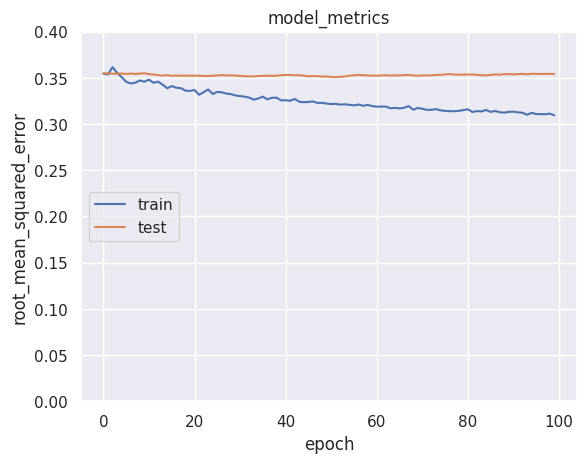

In [ ]:
# Menampilkan plot loss dan validation

plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.ylim(ymin=0, ymax=0.4)
plt.legend(['train', 'test'], loc='center left')
plt.show()

In [ ]:
# Menyiapkan dataframe
place_df = place[['Place_Id','Place_Name','Category','Rating','Price']]
place_df.columns = ['id','place_name','category','rating','price']
df = rating.copy()

In [ ]:
# Mengambil sample user
user_id = df.User_Id.sample(1).iloc[0]
place_visited_by_user = df[df.User_Id == user_id]

In [ ]:
# Membuat data lokasi yang belum dikunjungi user
place_not_visited = place_df[~place_df['id'].isin(place_visited_by_user.Place_Id.values)]['id'] 
place_not_visited = list(
    set(place_not_visited)
    .intersection(set(place_to_place_encoded.keys()))
)
 
place_not_visited = [[place_to_place_encoded.get(x)] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)
user_place_array = np.hstack(
    ([[user_encoder]] * len(place_not_visited), place_not_visited)
)

In [ ]:
# Mengambil top 7 recommendation
ratings = model.predict(user_place_array).flatten()
top_ratings_indices = ratings.argsort()[-7:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]
 
print('Daftar rekomendasi untuk: {}'.format('User ' + str(user_id)))
print('===' * 15,'\n')
print('----' * 15)
print('Tempat dengan rating wisata paling tinggi dari user')
print('----' * 15)
 
top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)
 
place_df_rows = place_df[place_df['id'].isin(top_place_user)]
for row in place_df_rows.itertuples():
    print(row.place_name, ':', row.category)

print('')
print('----' * 15)
print('Top 7 place recommendation')
print('----' * 15)
 
recommended_place = place_df[place_df['id'].isin(recommended_place_ids)]
for row, i in zip(recommended_place.itertuples(), range(1,8)):
    print(i,'.', row.place_name, '\n    ', row.category, ',', 'Harga Tiket Masuk ', row.price, ',', 'Rating Wisata ', row.rating,'\n')

print('==='*15)

4/4 [==============================] - 0s 2ms/step
Daftar rekomendasi untuk: User 298

------------------------------------------------------------
Tempat dengan rating wisata paling tinggi dari user
------------------------------------------------------------
Taman Balai Kota Bandung : Taman Hiburan
Taman Lalu Lintas Ade Irma Suryani Nasution : Taman Hiburan
Teras Cikapundung BBWS : Taman Hiburan
Museum Barli : Budaya
Jembatan Pasupati : Taman Hiburan

------------------------------------------------------------
Top 7 place recommendation
------------------------------------------------------------
1 . Dago Dreampark 
     Taman Hiburan , Harga Tiket Masuk  40000 , Rating Wisata  4.2 

2 . Lawangwangi Creative Space 
     Taman Hiburan , Harga Tiket Masuk  0 , Rating Wisata  4.4 

3 . Taman Lansia 
     Taman Hiburan , Harga Tiket Masuk  0 , Rating Wisata  4.4 

4 . Ciwangun Indah Camp Official 
     Cagar Alam , Harga Tiket Masuk  10000 , Rating Wisata  4.3 

5 . Masjid Agung Trans S